<a href="https://colab.research.google.com/github/pkmariya/AboutMe/blob/main/CNNImageProcessing_CIFARData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


In [29]:
# download the dataset
from keras.datasets import cifar10

In [30]:
# Load the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [31]:
X_train.shape

(50000, 32, 32, 3)

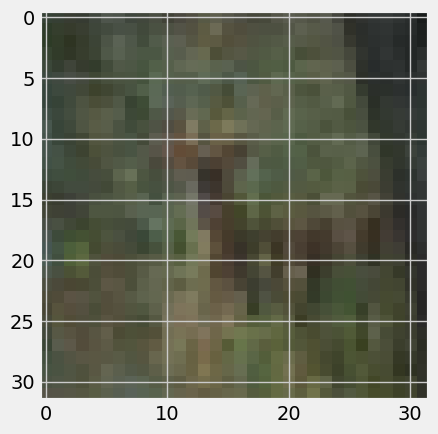

In [32]:
img10 = plt.imshow(X_train[10])

In [33]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
print("Image class is: ",class_names[Y_train[10][0]])

Image class is:  deer


In [35]:
# Change the label into set of numbers
ytrain_one_hot = to_categorical(Y_train)
ytest_one_hot = to_categorical(Y_test)

In [36]:
ytest_one_hot[100]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
# Normalize the pixel values
X_train = X_train/255
X_test = X_test/255

In [38]:
# Build the Model
model = Sequential()

# add first Conv layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
# add pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# add second Conv layer
model.add(Conv2D(32, (5,5), activation='relu'))
# add pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the layer
model.add(Flatten())

# add Dense layer
model.add(Dense(1000, activation='relu'))
# add Dropout layer
model.add(Dropout(0.5))

# add another layer
model.add(Dense(500, activation='relu'))
# add a Dropout layer
model.add(Dropout(0.5))

# add another layer
model.add(Dense(250, activation='relu'))

# add the output layer; as there are 10 class_names, we use 10 here in the below Dense size. Because the Dense size is more than 1(multi-class),
# the activation type is 'softmax'. If the size is 1, then it's a binary classification, so we will use 'sigmoid' activation function.
model.add(Dense(10, activation='softmax'))


In [39]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)             

In [40]:
# Compile the model to add loss and optimizer functions
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.fit(X_train, ytrain_one_hot, batch_size=256, epochs=1, validation_split=0.2)

157/157 [==============================] - 73s 453ms/step - loss: 1.7984 - accuracy: 0.3294 - val_loss: 1.4604 - val_accuracy: 0.4574


In [42]:
model.evaluate(X_test, ytest_one_hot)

313/313 [==============================] - 10s 30ms/step - loss: 1.4436 - accuracy: 0.4685


[1.4435551166534424, 0.4684999883174896]

#### as the accuracy is low, we will try model fit and model evaluation again.

In [44]:
model.fit(X_train, ytrain_one_hot, batch_size=256, epochs=1, validation_split=0.2)

157/157 [==============================] - 74s 472ms/step - loss: 1.4074 - accuracy: 0.4890 - val_loss: 1.2718 - val_accuracy: 0.5491


In [45]:
model.evaluate(X_test, ytest_one_hot)

313/313 [==============================] - 9s 28ms/step - loss: 1.2571 - accuracy: 0.5467


[1.2570686340332031, 0.5467000007629395]